# Bài tập thực hành 2

## Yêu cầu

Dự đoán doanh thu xe hơi Hyundai dòng Elantra trong năm 2013 và đầu 2014, dựa vào dữ liệu trước đó

## Dữ liệu

Dữ liệu được ghi trong file elantra.csv với các trường (Month, Year, ElantraSales, Unemployment, Queries, CPI_energy, CPI_all). Giá trị cần dự đoán sẽ là ElantraSales.

## Đánh giá

Đánh giá mô hình dựa trên
* Độ đo tiêu chuẩn của ML: RMSE = $\sqrt{\text{avg}\left(y^{\left(n\right)}-\hat{y}^{\left(n\right)}\right)^{2}}$
* Độ đo của business requirements: Mean relative errors = $\text{avg}\left(\dfrac{\left|y^{\left(n\right)}-\hat{y}^{\left(n\right)}\right|}{y^{\left(n\right)}}\right)\times100\%$

# Đọc dữ liệu

In [ ]:
import pandas as pd
import numpy as np  # thư viện cho tính toán nói chung

df = pd.read_csv('elantra.csv')

In [ ]:
df.tail(10)

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
40,10,2012,14512,7.8,257,256.389,231.652
41,10,2013,14876,7.2,223,243.374,233.782
42,11,2010,8631,9.8,161,219.303,219.544
43,11,2011,12414,8.6,255,247.092,227.136
44,11,2012,15923,7.8,246,248.136,231.190
45,11,2013,16751,7.0,231,242.301,234.033
46,12,2010,13096,9.4,170,227.190,220.437
47,12,2011,13025,8.5,253,243.015,227.093
48,12,2012,19024,7.9,275,244.698,231.099
49,12,2013,21692,6.7,279,246.189,234.594


In [ ]:
##### exercise #####
# Yêu cầu: Sắp xếp lại thứ tự các hàng dữ liệu theo tháng/năm
# Gợi ý: sử dụng df.sort_values và df.reset_index
######################
df_sorted = df.sort_values(by=['Year', 'Month']).reset_index(drop=True)
print(df_sorted.head())

   Month  Year  ElantraSales  Unemployment  Queries  CPI_energy  CPI_all
0      1  2010          7690           9.7      153     213.377  217.466
1      2  2010          7966           9.8      130     209.924  217.251
2      3  2010          8225           9.9      138     209.163  217.305
3      4  2010          9657           9.9      132     209.024  217.376
4      5  2010          9781           9.6      177     206.172  217.299


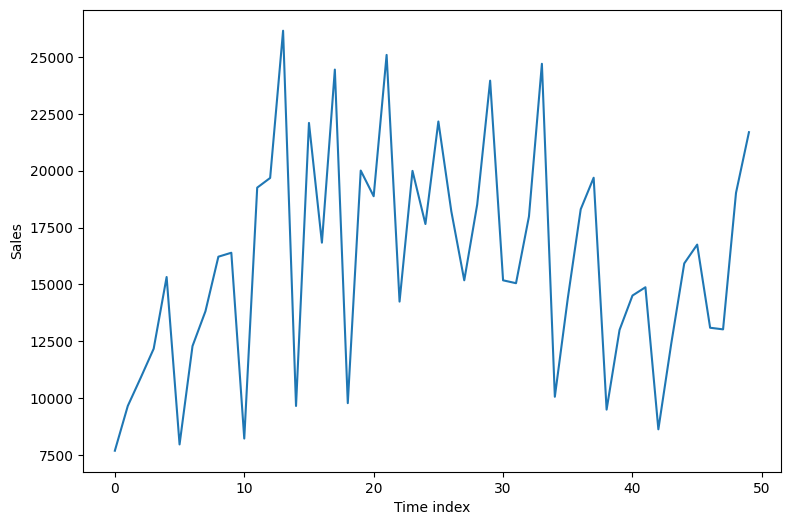

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))

plt.plot(df.ElantraSales.values)

plt.xlabel('Time index')

plt.ylabel('Sales')


# function to show the plot
plt.show()

In [ ]:
numeric_feats = df.columns.drop(["ElantraSales", "Month", "Year"])
numeric_feats

Index(['Unemployment', 'Queries', 'CPI_energy', 'CPI_all'], dtype='object')

In [ ]:
df_train = df[df.Year < 2013]
df_test = df[df.Year >= 2013]

y_train = df_train.ElantraSales.values
y_test = df_test.ElantraSales.values

**feature scaling**

In [ ]:
# Chuẩn hóa dữ liệu bằng StandardScaler, dữ liệu được chuẩn hóa theo dạng x -> (x-mean)/std
# Nếu x có phân phối Gauss, dữ liệu chuẩn hóa sẽ thuộc phân phối N(0,1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_train[numeric_feats])

X_train = scaler.transform(df_train[numeric_feats])
X_test = scaler.transform(df_test[numeric_feats])

# Xây dựng Mô hình

In [ ]:
###### exercise #####
# Yêu cầu: Xây dựng và huấn luyện mô hình Linear Regression
# Gợi ý: sử dụng hàm fit() như trong bài thực hành 1
######################
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

# Đánh giá

In [ ]:
from sklearn.metrics import mean_squared_error

def relative_error(y_true, y_pred):
    errors = np.abs(y_pred - y_true).astype(float) / y_true
    return np.mean(errors)*100

In [ ]:
y_pred_test = model1.predict(X_test)
print ('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print ('Mean relative errors: {:.1f}%'.format(relative_error(y_test, y_pred_test)))

RMSE: 5017.35
Mean relative errors: 19.0%


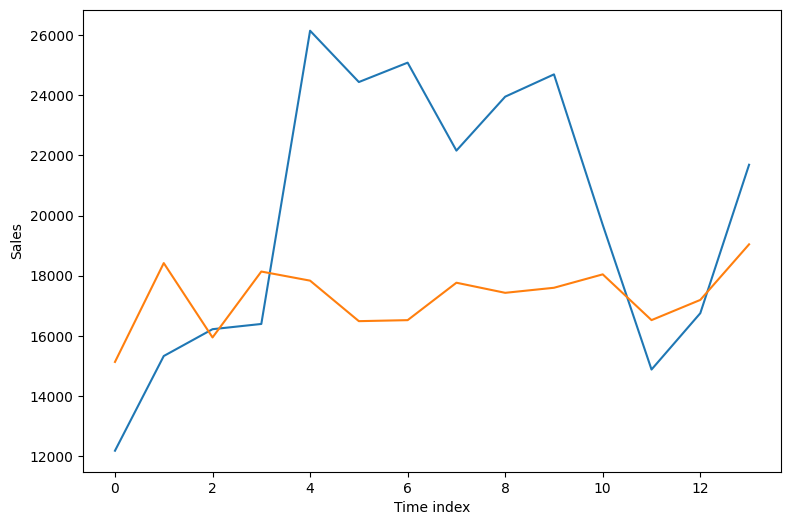

In [ ]:
###### exercise #####
# Yêu cầu: Vẽ biểu đồ đường so sánh y_test và y_pred_test
# Gợi ý: sử dụng matplotlib như bài thực hành 1
######################
plt.figure(figsize=(9,6))

plt.plot(y_test)
plt.plot(y_pred_test)

plt.xlabel('Time index')

plt.ylabel('Sales')
plt.show()

Kết quả dự đoán không khớp một chút nào so với dữ liệu thật

Lý do có thể là vì chúng ta chưa tận dụng hết thông tin của dữ liệu

Quan sát thấy doanh thu có xu hướng biến động theo từ tháng trong một năm

=> Tận dụng thông tin tháng hiệu quả. Có thể xây dựng mô hình regression với đặc trưng Month theo kiểu categorical kết hợp với các đặc trưng khác.

# Giải pháp cải tiến

In [ ]:
month_onehot_train = pd.get_dummies(df_train.Month)
month_onehot_train.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,True,False,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False
6,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
###### exercise #####
# Yêu cầu: Ghép đặc trưng Month_1, ..., Month_12 vào các đặc trưng đang có, kết quả ở dạng numpy array
# Gợi ý: sử dụng np.hstack
######################
X_train = np.hstack((X_train, month_onehot_train))
X_train[0]


array([ 1.24576653, -1.25517995, -1.21438113, -1.35903692,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [ ]:
# Tương tự với X_test
X_test = np.hstack((X_test, pd.get_dummies(df_test.Month)))

In [ ]:
print(X_train.shape)
print(X_test.shape)

(36, 28)
(14, 16)


In [ ]:
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_test = model1.predict(X_test)
print ('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print ('Mean relative errors: {:.1f}%'.format(relative_error(y_test, y_pred_test)))

ValueError: X has 16 features, but LinearRegression is expecting 28 features as input.

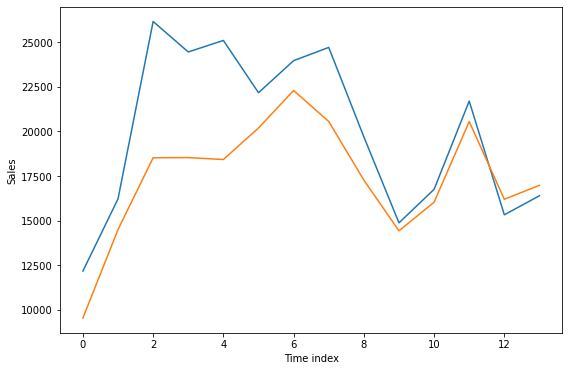

In [ ]:
plt.figure(figsize=(9,6))

plt.plot(y_test)
plt.plot(y_pred_test)

plt.xlabel('Time index')

plt.ylabel('Sales')


# function to show the plot
plt.show()